Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present more unique, personalized way of experiencing the world. This dataset describes the listing activity and metrics in NYC, NY for 2019.

This data provide a rich source of information which we can analyse to get insights. This makes business decisions regarding customer and host behaviour, security, implementing innovative solutions and general business performance easier, more targeted and much more effective.

## Source of Data
The data was collected from kaggle but you can find the original source in this [website](http://insideairbnb.com/)

## Data Dictionary

name : name of the listing

host_id : host ID

host_name : name of the host

neighbourhood_group : location
neighbourhood area

latitude : latitude coordinates

longitude: longitude coordinates

room_type : listing space type

price :price in dollars

minimum_nights : amount of nights minimum

number_of_reviews : number of reviews

last_review : latest review

reviews_per_month : number of reviews per month

calculated_host_listings_count : amount of listing per host

availability_365 : number of days when listing is available for booking


In [1]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the csv file and rendering as a pandas Dataframe
airbnb = pd.read_csv("AB_NYC_2019.csv")

## Inspecting the Dataset

In [3]:
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [5]:
airbnb.shape

(48895, 16)

In [6]:
airbnb.duplicated().value_counts()

False    48895
dtype: int64

From what we can see here, we have about 16 columns and 48,895 rows in the dataset. This provides extensive detail of the data we have. Also we don't have any duplicate rows or columns but it is obvious we have some missing values. We now check through the columns to find how many we have.

In [7]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Visulalizing missing values in the dataset

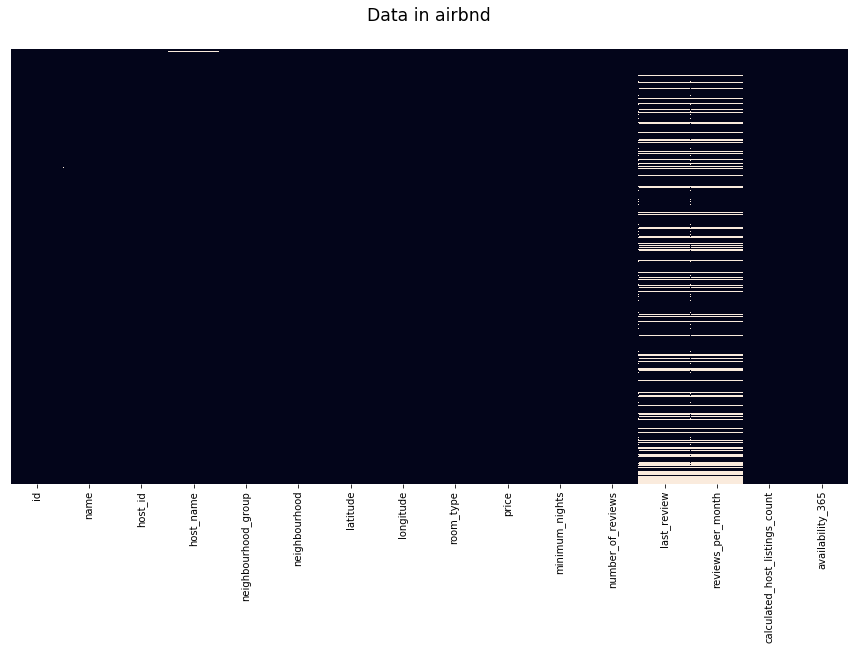

In [8]:
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.heatmap(airbnb.isnull(), cbar=False)
ax.set_yticks([])
ax.set_title("Data in airbnd", fontsize ="xx-large").set_position([0.5, 1.05])
plt.show()

A few of the columns have null values. We have a few in the host_name column while most of the values in the last_review and reviews_per_month are missing. In most rows, both values are missing.

We will have to drop the host_name column for ethical reasons. It contains the real names of people and we don't really need it for our analysis. The last_review column is supposed to be the date when a customer last reviewed a listing while the reviews_per_month is a counts of all reviews per month. We need to investigate further why these columns have null values. 

In [9]:
airbnb[airbnb["last_review"].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
19,7750,Huge 2 BR Upper East Cental Park,17985,Sing,Manhattan,East Harlem,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,NaN,2,249
26,8700,Magnifique Suite au N de Manhattan - vue Cloitres,26394,Claude & Sophie,Manhattan,Inwood,40.86754,-73.92639,Private room,80,4,0,NaN,NaN,1,0
36,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,365
38,11943,Country space in the city,45445,Harriet,Brooklyn,Flatbush,40.63702,-73.96327,Private room,150,1,0,NaN,NaN,1,365


From what we can see, when the last_review column is NaN, the number_of_reviews is zero. This is because no customer has reviewed the listing and thus a date for last review is not available. We will need to drop this column too. As for the reviews_per_month column, will have to fill in the NaN values with the number of reviews gotten and in this case zero(0). 

In [10]:
airbnb.drop(["host_name", "last_review"], axis =1, inplace =True)

In [11]:
airbnb["reviews_per_month"].fillna(0, inplace=True)

We now check on the name column. We  have 16 NaN values, so we investigate further .

The name column is a listing description written by the hosts. Since there are no description for these apartments, will fill it in with "Not Described"

In [12]:
airbnb["name"]=airbnb["name"].fillna("Not Described")

In [13]:
airbnb.isnull().sum()

id                                0
name                              0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

# Exploratory Data Analysis and Visualization.
We are interested in answering several questions here.

1. who are the busiest host?
2. Which neighbourhood have more traffic and which are least?
3. Is there any relationship between price and number of reviews, location and availabilty?
4. Is Airbnb really a sharing economy , distrupting the hotel business as they claim or are full homes listed throughout the year making it just like hotels?

## The busiest Hosts

In [14]:
# we do a value count on the host_id column because it contains the unique identity of each host.
airbnb["host_id"].value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [15]:
# we confirm the maximum number of listing with the calculated_host_listings_count column. 
airbnb["calculated_host_listings_count"].max()

327

What we see here is the the highest almost of listings is 327. This host seems the busiest. We visualize this using a simple bar plot

In [16]:
#  taking the 10 busiest hosts.
top_10_listing = airbnb["host_id"].value_counts().head(10)

In [17]:
#setting figure size and style for future visualizations
sns.set(rc={'figure.figsize':(10,8)})
sns.set_style(style = "white")

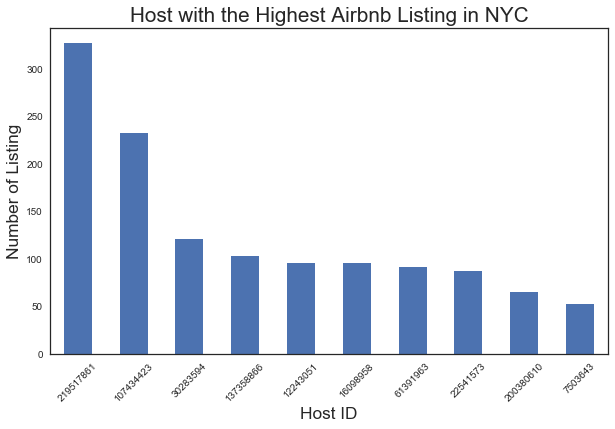

In [18]:
ax = top_10_listing.plot(kind = "bar" , figsize = (10,6))
ax.set_xlabel("Host ID", fontsize="x-large")
ax.set_ylabel("Number of Listing", fontsize="x-large")
ax.set_title("Host with the Highest Airbnb Listing in NYC", fontsize="xx-large")
ax.tick_params(bottom =False, left= False)
ax.set_xticklabels(ax.get_xticklabels(), rotation =45)
plt.show();

## Which areas are more traffic and which are the least?

We do a value_counts of neighorhood and get to find the top 5 most traffic areas. We would like to incoporate this analysis with the room types for a richer visualization.

In [19]:
airbnb["neighbourhood"].value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [20]:
# we create a new dataset of just the top ten neighbourhoods using groupby 
# and filtering with the value count of the tenth neighbourhood
top_neig = airbnb.groupby("neighbourhood").filter(lambda x: len(x)>=1545)

In [21]:
top_10 = top_neig.pivot_table(index="neighbourhood", columns= "room_type", values="neighbourhood_group", aggfunc="count").reset_index().set_index("neighbourhood")

In [22]:
top_10

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Bedford-Stuyvesant,1591,2038,85
Bushwick,678,1719,68
Crown Heights,759,780,25
East Village,1170,660,23
Harlem,1036,1573,49
Hell's Kitchen,1187,672,99
Midtown,1100,422,23
Upper East Side,1310,441,47
Upper West Side,1256,675,40


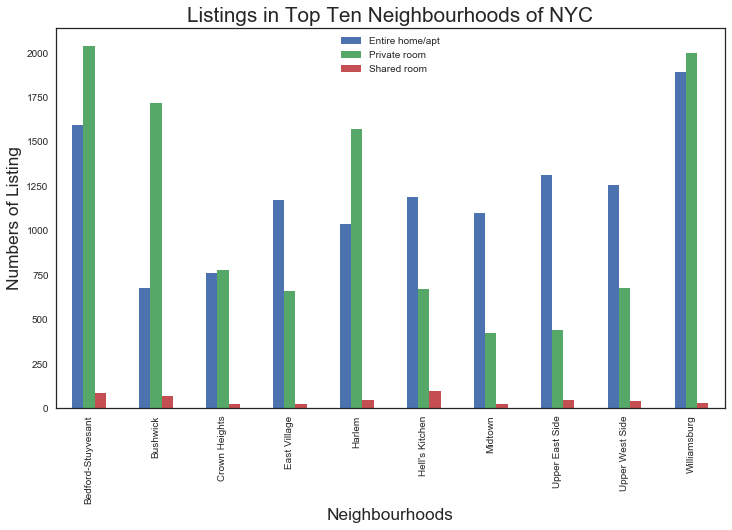

In [23]:
ax= top_10.plot(kind="bar", figsize= (12,7))
ax.legend(loc="upper center")
ax.set_xlabel("Neighbourhoods", fontsize="x-large")
ax.set_ylabel("Numbers of Listing", fontsize="x-large")
ax.set_title("Listings in Top Ten Neighbourhoods of NYC",fontsize="xx-large")
plt.show();

From the visuals, it obvious that Williamsburg has the highest listing for Entire Home and apartment, Bedford-Stuyvesant shows the highest for private rooms and also for shared rooms. These two cities are in Brokyln. It is known that Brokyln is a highly traficked area in NYC so this result is expected.

Bushwick has the lowest number of entire home/apartment listing while this is also true for Midtown in the private rooms and shared rooms listing. Bushwick is in Brokyln while Midtown is a neighbourhood in Manhattan.

### The Impact of price on neighbourhoods and neighbourhood_groups.

Let's see the price distribution in the neighbourhoods_groups and our top_10 neighbourhoods. But first, let's look at the statistics of price column of the dataset and visualize the data with a scatter plot.

In [ ]:
airbnb.describe(percentiles=[.25,.50, .75,.90])["price"][1:]

mean      152.720687
std       240.154170
min         0.000000
25%        69.000000
50%       106.000000
75%       175.000000
90%       269.000000
max     10000.000000
Name: price, dtype: float64

In [ ]:
fig,ax=plt.subplots(figsize=(10,4))
ax.scatter(x=airbnb["neighbourhood_group"], y = airbnb["price"])
ax.tick_params(bottom = False, left = False, right = False, top =False)
ax.set_xticks(airbnb["neighbourhood_group"])
ax.set_xticklabels(airbnb["neighbourhood_group"], rotation=90,fontweight="light")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show();

With the mean price around 150 dollars, a maximum price of 10,000 dollars seems to be an outlier and unrealistic. However, when we checked listings of NYC on airbnb, it bacame obvious that these extreme values were actually not a mistake. But for a better visualization, we decide to use part of the dataset whose price is less than or equal to 1000 dollars. But first, we have to find out the percentage of data that falls outside this range. This will help us decide whether to go ahead or not.

In [ ]:
(airbnb["price"]>1000).sum()/airbnb.shape[0]

Only about 5% of our data will be dropped so we can go ahead

In [ ]:
sub_df = airbnb[airbnb["price"]<=1000]

In [ ]:
ax = sns.violinplot(data = sub_df, x ="neighbourhood_group", y ="price")
ax.set_title("Price spread in NYC Neighbourhood_groups", fontsize ="xx-large")
ax.set_xlabel("Neighbourhood_groups", fontsize ="x-large")
ax.set_ylabel("Price", fontsize ="x-large")
plt.show();

The violin plot shows the price spread accross different neighbourhood groups in NYC. It is noticeable from the plot that Manhattan has the highest spread followed by Brokyln. This is expected because it is known by most people that the cost of living is higher in those cities. Queens and Staten Island shows a similar spread while Bronx has the least. 

## Are there any relationships between Price, Reviews and Availability?

We use correction to find out the relationships between the columns in the dataset and we visualize it using a seaborn heatmap

In [ ]:
sns.heatmap(airbnb.corr(), annot = True, fmt=' .1g', cmap = "cubehelix")

There is a -0.05 correlation coefficient between price and reviews. This correlation is very weak and so cannot be considered relevant. Being negative means that when price increases with a reduction in the number of reviews.

A correlation coefficient of 0.06 exists between price and availability count. While the value being positive means that price increases with increase in availability, This value is insignificant.

## Is Airbnb really a sharing economy , distrupting the hotel business as they claim or are full homes listed throughout the year making it just like hotels?

To answer this question we create a pivot table showing room_type and avarage availability using a dataset where availability is 365 days.

In [ ]:
avail_365 = airbnb[airbnb["availability_365"]==365].pivot_table(index = "room_type", values= "availability_365", aggfunc="count").reset_index().set_index("room_type")

In [ ]:
avail_365

In [ ]:
fig,ax= plt.subplots(figsize = (10,5))
ax.pie(avail_365, labels = ["Entire home/apt", "Private room","Shared room"],explode=(0.04,0.04,0.04),autopct='%1.1f%%', textprops={'fontsize': 15})
ax.axis("equal")
ax.set_title("Room_types listed throughout the year in NYC", fontsize="xx-large").set_position([.5, 1.05])
plt.show();

The pivot table and accompanied pie chart reveals that more private room are listed throughout the year than entire homes or apartments thus we cannot conclude that Airbnb actually runs as the convetional hotel business system. The insights suggests that the company supports a sharing economy.